Using offline best layout, active stations: [2 3 4 5 6 7]


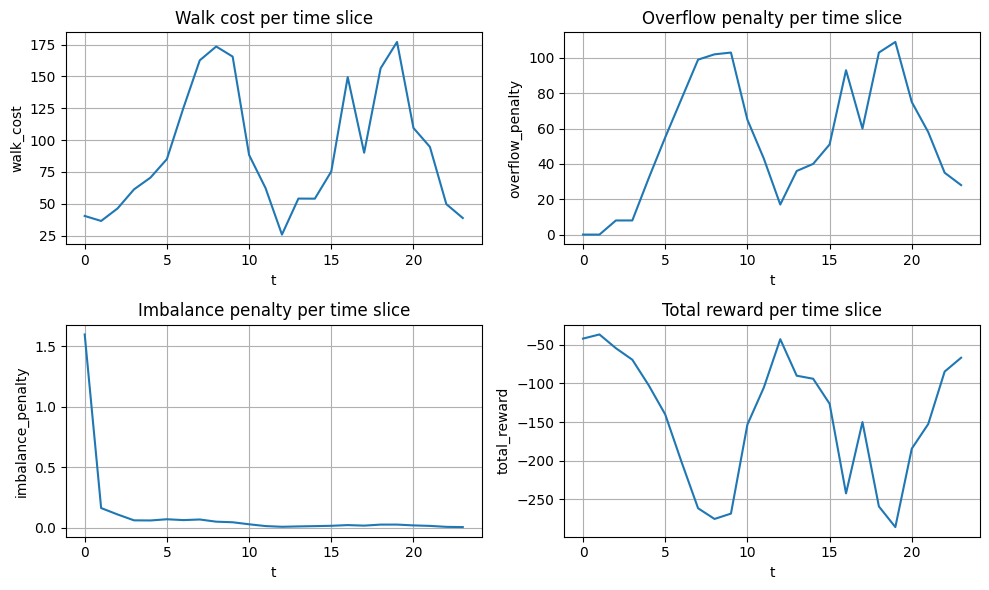

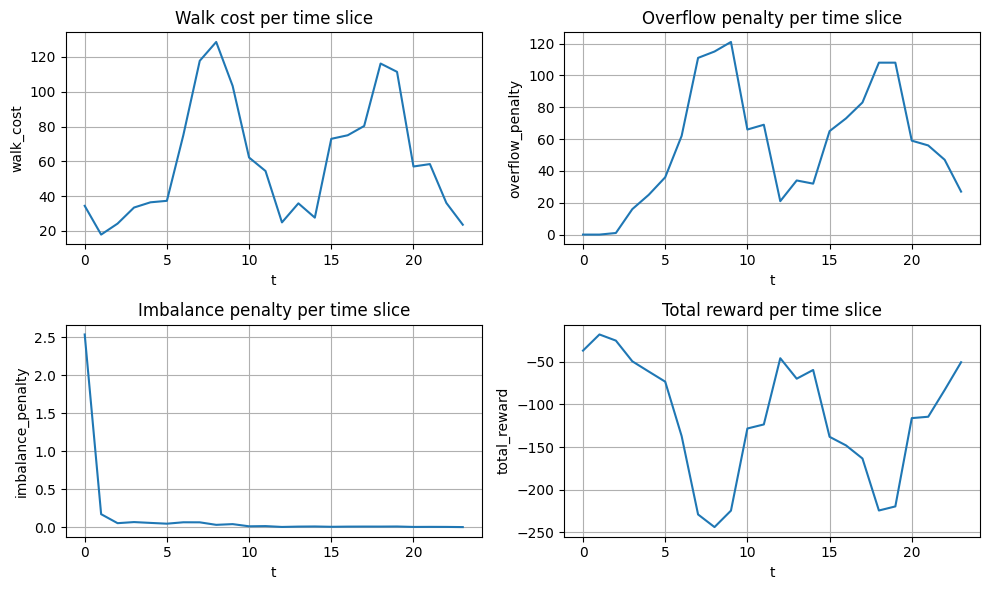

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.data_prep import load_data
from src.offline_model import random_search
from src.online_policy import LinUCB
from src.simulate import BikeEnv
from src.viz import plot_online_curves

D, Dist, cap, meta, stations = load_data("data/processed")

best, history = random_search(
    D, Dist, cap,
    budget_min=3,
    budget_max=6,
    n_samples=200,
    rng_seed=0,
)

y_best = best["y"]
print("Using offline best layout, active stations:", np.where(y_best > 0.5)[0])

alpha_walk = 1.0
lam_over = 1.0
mu_imb = 1.0

env = BikeEnv(D, Dist, cap, y_best,
              alpha_walk=alpha_walk,
              lam_over=lam_over,
              mu_imb=mu_imb,
              rng_seed=0)

# baseline: no policy (随机选最近几个站)
hist_baseline = env.run_episode(policy=None)
plot_online_curves(hist_baseline)

# LinUCB policy
dim = 5  # 和 build_feature_vector 里保持一致
policy = LinUCB(dim=dim, alpha=1.0)
env2 = BikeEnv(D, Dist, cap, y_best,
               alpha_walk=alpha_walk,
               lam_over=lam_over,
               mu_imb=mu_imb,
               rng_seed=1)
hist_ucb = env2.run_episode(policy=policy)
plot_online_curves(hist_ucb)
